# Exploring the Relationship Between Global Population Trends and Economic Prosperity (1960–2021)

#### Goal of this project
This project aims to explore the relationship between global population trends and economic prosperity from 1960 to 2021. By combining world population data and GDP per capita data, I will analyze how economic growth impacts demographic changes across countries over time. The project will involve cleaning and merging these datasets to enable a thorough exploratory data analysis and draw meaningful insights.

#### 5 Research Questions to Answer:
1. How has the world population changed across different countries from 1960 to 2021?
2. What are the trends in GDP per capita during the same period, and how do they vary by region or country?
3. Is there a correlation between GDP per capita and population growth rates at the country level?
4. Which countries have experienced high population growth but low economic growth, and vice versa?
5. How do economic and demographic trends differ between developed and developing countries?

In the following cell we'll import the needed libraries for the entire project:

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from matplotlib.ticker import ScalarFormatter

In the next one we'll load the datasets using pandas:


In [2]:
#Load datasets into pandas DataFrames
pop_df = pd.read_csv('Edited Data/World-population-by-countries-dataset.csv')
gdp_df = pd.read_csv('Edited Data/gdppercapita_us_inflation_adjusted.csv')


### Visual Assessments

Let's check if they got loaded correctly

Firstly the population dataset:


In [3]:
pop_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [4]:
# non-directed sampling of the Population DataFrame
# This will give a random sample of rows from the DataFrame
pop_df.sample(random_state = 2)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
141,Lesotho,LSO,837264.0,852892.0,869132.0,886061.0,903757.0,922307.0,941798.0,962279.0,...,2014988.0,2028528.0,2043448.0,2059011.0,2075041.0,2091532.0,2108327.0,2125267.0,2142252.0,2159067.0


In [5]:
# This will return the descriptive statistics of the Population DataFrame
# It includes count, mean, std, min, 25%, 50%, 75%, max
pop_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.874902e+08,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.017511e+08,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.539939e+06,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.824808e+06,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.057984e+07,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


GDP dataset:


In [6]:
gdp_df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.3k,27.8k,27.6k,28.4k,28.9k,30.3k,31.7k,31.8k,25.8k,30.3k
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,596,608,603,592,590,589,579,584,553,426
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120,3150,3190,3100,2910,2810,2680,2570,2350,2300
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3740,3780,3860,3950,4090,4250,4430,4540,4410,4830
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.2k,37.6k,38.4k,38.9k,39.9k,39.3k,39.3k,39.4k,34.4k,36.8k


In [7]:
# non-directed sampling of the GDP DataFrame
# This will give a random sample of rows from the DataFrame
gdp_df.sample(random_state = 2)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
131,Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,531,551,574,594,598,601,604,600,576,573


In [8]:
# This will return the descriptive statistics of the GDP DataFrame
# It includes count, mean, std, min, 25%, 50%, 75%, max
gdp_df.describe()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,211,87,91,91,91,91,96,99,100,102,...,205,207,207,210,206,206,206,204,201,196
unique,211,84,87,85,87,86,89,96,96,100,...,195,193,194,199,199,190,192,191,186,182
top,Aruba,1200,1180,7500,1150,14.1k,2730,1250,553,1280,...,33.5k,2590,1200,25.8k,1340,13.6k,5260,15.1k,1620,18.2k
freq,1,2,3,3,2,2,2,2,2,2,...,2,3,3,2,3,4,3,4,2,3


## Let's define a helper function to summarize each dataset

This function prints:
- Dataset shape
- Column names
- First few rows
- Missing values count
- Number of duplicate rows


In [9]:
# Defining a helper function to summarize each dataset
def data_overview(df, name):
    print(f"\n--- {name} Dataset Overview ---")
    print("---------------------------------------")
    print(f"Shape: {df.shape}")
    print("---------------------------------------")
    print("Columns:")
    print(df.columns.tolist())
    print("---------------------------------------")
    print("Missing values per column:")
    print(df.isnull().sum().tolist())
    print(f"Total missing values: {df.isnull().sum().sum()}")
    print("---------------------------------------")
    print("Duplicates:", df.duplicated().sum())
    print("---------------------------------------")
    print(f"Index: {df.index}")
    print("---------------------------------------")
    dtype_counts = df.dtypes.value_counts()
    dtype_summary = ', '.join([f"{dtype}({count})" for dtype, count in dtype_counts.items()])
    print(f"Data Types: {dtype_summary}")

In [10]:
# Summarizing the population dataset
data_overview(pop_df, "Population")


--- Population Dataset Overview ---
---------------------------------------
Shape: (266, 64)
---------------------------------------
Columns:
['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
---------------------------------------
Missing values per column:
[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Total missing values: 105
---------------------------------------
Du

Next we'll use a heatmap to visualize null values:

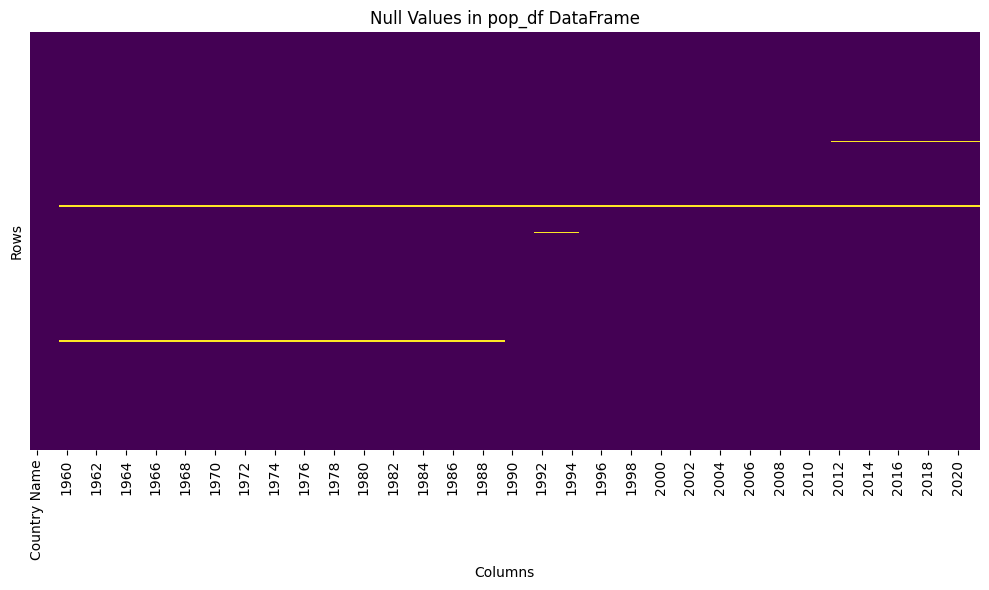

In [11]:
# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Plot a heatmap showing where the population DataFrame (pop_df) has missing values
# Each cell is colored if the value is missing (NaN)
sns.heatmap(pop_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Set the plot title (note: the title should reference pop_df, not gdp_tidy)
plt.title('Null Values in pop_df DataFrame')

# Label the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('Rows')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
# Summarizing the GDP per capita dataset
data_overview(gdp_df, "GDP per Capita")


--- GDP per Capita Dataset Overview ---
---------------------------------------
Shape: (211, 63)
---------------------------------------
Columns:
['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
---------------------------------------
Missing values per column:
[0, 124, 120, 120, 120, 120, 115, 112, 111, 109, 109, 99, 99, 99, 99, 97, 95, 93, 87, 87, 86, 74, 70, 67, 67, 64, 63, 59, 56, 54, 53, 43, 42, 39, 38, 36, 26, 26, 23, 23, 22, 17, 16, 11, 11, 10, 10, 9, 9, 7, 6, 6, 5, 6, 4, 4, 1, 5, 5, 5, 7, 10, 15]
Total missing values: 3225
---

Let's Visualize the null values using a heatmap:

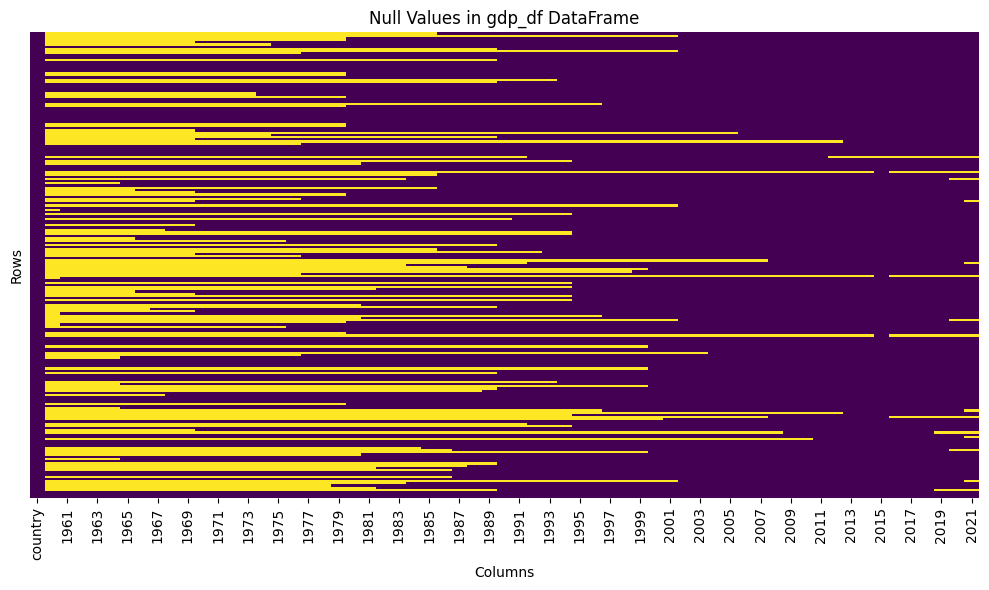

In [13]:
# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Plot a heatmap showing where the GDP DataFrame (gdp_df) has missing values
# Each cell is colored if the value is missing (NaN)
sns.heatmap(gdp_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Set the plot title (note: the title should reference gdp_df, not gdp_tidy)
plt.title('Null Values in gdp_df DataFrame')

# Label the x-axis and y-axis
plt.xlabel('Columns')
plt.ylabel('Rows')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Now let's summarize using .info:


In [14]:
# summarizing using .info
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

In [15]:
# Summarizing the GDP per capita dataset
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  211 non-null    object
 1   1960     87 non-null     object
 2   1961     91 non-null     object
 3   1962     91 non-null     object
 4   1963     91 non-null     object
 5   1964     91 non-null     object
 6   1965     96 non-null     object
 7   1966     99 non-null     object
 8   1967     100 non-null    object
 9   1968     102 non-null    object
 10  1969     102 non-null    object
 11  1970     112 non-null    object
 12  1971     112 non-null    object
 13  1972     112 non-null    object
 14  1973     112 non-null    object
 15  1974     114 non-null    object
 16  1975     116 non-null    object
 17  1976     118 non-null    object
 18  1977     124 non-null    object
 19  1978     124 non-null    object
 20  1979     125 non-null    object
 21  1980     137 non-null    object
 22  19

## Cleaning the data

Let's assess data quality and tidiness issues

After running the overview on both datasets, I identified the following issues:

##### Data quality issues:
1. **Missing values**:  
   - The population dataset has 105 missing values spread across many year columns.
   - The GDP per capita dataset has significant missing values (total: 3,225), especially in older years.
2. **Incorrect data types**:  
   - In the GDP per capita dataset, year columns are stored as `object` type instead of numeric (should be `float64` or `int`).

---

##### Data tidiness issues:
1. **Wide format instead of tidy**:  
   - Both datasets have years (1960–2021) as separate columns, instead of as values in a single "Year" column.  
   - This breaks the tidy data rule: each variable should form a column.
2. **Need to merge datasets**:  
   - To analyze relationships between population and GDP per capita, we need to combine the two datasets on a common key (e.g., country and year).  
   - Right now, the data is split across two tables, so a single observation is spread across multiple tables.

---

These issues will be addressed in the cleaning phase next.

**Extra data quality issue identified:**
- In the GDP per capita dataset, numeric values are stored as strings with "k" suffix (e.g., "49.01k"), which makes them object type instead of numeric.  
- This requires parsing: removing the suffix and multiplying to get the true numeric value.

#### Based on the issues identified earlier, the cleaning process will include:
1. Convert GDP per capita values into numeric values as well as the stored strings with "k" suffix to proper numeric values. 
2. Fix incorrect data types (convert year columns from object to float).
3. Reshape both datasets from wide format (years as columns) to long/tidy format (years as rows) and place the countries in the columns position. 
4. Handle missing values:
   - Decide whether to keep, drop, or impute based on their distribution and impact.
5. Merge the two datasets on country and year.
6. Optimize memory by downcasting numeric columns where possible.

## Convert GDP per capita values to numeric (handle mixed formats)

Some values are written as "49.01k", while others are normal numbers like "5150".  
We'll:
- Remove "k" where it exists and multiply by 1000.
- Convert other numbers directly to float.

In [16]:
gdp_years = gdp_df.columns[1:] # Exclude the first column which is 'Country Name'

for col in gdp_years:
    # Always convert to string, strip spaces, remove commas
    cleaned = gdp_df[col].astype(str).str.replace(',', '').str.strip() # Remove commas and strip spaces
    
    # If value contains 'k', remove it, convert to float, then multiply
    has_k = cleaned.str.contains('k', case=False, na=False)
    cleaned_with_k = pd.to_numeric(
        cleaned[has_k].str.replace('k', '', case=False, regex=False),
        errors='coerce'
    ) * 1000
    
    # If value doesn't contain 'k', convert directly
    cleaned_without_k = pd.to_numeric(cleaned[~has_k], errors='coerce')
    
    # Combine back into the column
    gdp_df.loc[has_k, col] = cleaned_with_k
    gdp_df.loc[~has_k, col] = cleaned_without_k
    
    # Force entire column to float
    gdp_df[col] = pd.to_numeric(gdp_df[col], errors='coerce')

# Check result
data_overview(gdp_df, "GDP per Capita (final cleaned values, fixed scaling)")



--- GDP per Capita (final cleaned values, fixed scaling) Dataset Overview ---
---------------------------------------
Shape: (211, 63)
---------------------------------------
Columns:
['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
---------------------------------------
Missing values per column:
[0, 124, 120, 120, 120, 120, 115, 112, 111, 109, 109, 99, 99, 99, 99, 97, 95, 93, 87, 87, 86, 74, 70, 67, 67, 64, 63, 59, 56, 54, 53, 43, 42, 39, 38, 36, 26, 26, 23, 23, 22, 17, 16, 11, 11, 10, 10, 9, 9, 7, 6, 6, 5, 6, 4, 4, 1, 5, 5, 5, 7, 

In [17]:
# Check the first few rows of the cleaned GDP DataFrame
gdp_df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26300.0,27800.0,27600.0,28400.0,28900.0,30300.0,31700.0,31800.0,25800.0,30300.0
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,596.0,608.0,603.0,592.0,590.0,589.0,579.0,584.0,553.0,426.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120.0,3150.0,3190.0,3100.0,2910.0,2810.0,2680.0,2570.0,2350.0,2300.0
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3740.0,3780.0,3860.0,3950.0,4090.0,4250.0,4430.0,4540.0,4410.0,4830.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39200.0,37600.0,38400.0,38900.0,39900.0,39300.0,39300.0,39400.0,34400.0,36800.0


## Reshape datasets from wide to tidy format

Both datasets are currently in wide format, where each year is a column.  
We'll melt them so that years become rows, giving us:
- `country`, `year`, `population` for the population dataset.
- `country`, `year`, `gdp_per_capita` for the GDP dataset.

This makes them easier to merge and analyze.


In [18]:
# Identify year columns (should be the same range in both)
pop_years = pop_df.columns[2:]  # after 'Country Name' and 'Country Code'
gdp_years = gdp_df.columns[1:]  # after 'country'

# Melt (reshape) the population dataset
pop_tidy = pop_df.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=pop_years,
    var_name='year',
    value_name='population'
)

# Melt the GDP dataset
gdp_tidy = gdp_df.melt(
    id_vars=['country'],
    value_vars=gdp_years,
    var_name='year',
    value_name='gdp_per_capita'
)

# Quick check
print("\nPopulation Tidy Dataset:")
print(pop_tidy.head())

print("\nGDP Tidy Dataset:")
print(gdp_tidy.head())



Population Tidy Dataset:
                  Country Name Country Code  year   population
0                        Aruba          ABW  1960      54208.0
1  Africa Eastern and Southern          AFE  1960  130836765.0
2                  Afghanistan          AFG  1960    8996967.0
3   Africa Western and Central          AFW  1960   96396419.0
4                       Angola          AGO  1960    5454938.0

GDP Tidy Dataset:
       country  year  gdp_per_capita
0        Aruba  1960             NaN
1  Afghanistan  1960             NaN
2       Angola  1960             NaN
3      Albania  1960             NaN
4      Andorra  1960             NaN


## Prepare datasets for merging and merge them

We will:  
- Standardize country column names to lowercase `country` in both datasets.  
- Convert `year` columns to numeric integers.  
- Merge the datasets on `country` and `year` using an inner join to keep only matching records.

A part of This process is alos known as Un-Pivoting or Melting

In [19]:
# Standardize country column names
pop_tidy = pop_tidy.rename(columns={'Country Name': 'country'}) # Rename to 'country' for consistency
gdp_tidy = gdp_tidy.rename(columns={'country': 'country'})  # already 'country', just to be explicit

# Convert year columns to int
pop_tidy['year'] = pd.to_numeric(pop_tidy['year'], errors='coerce').astype('Int64')
gdp_tidy['year'] = pd.to_numeric(gdp_tidy['year'], errors='coerce').astype('Int64')

# Merge on 'country' and 'year'
merged_df = pd.merge(pop_tidy, gdp_tidy, on=['country', 'year'], how='inner')

# Quick check of merged dataset
print(f"Merged Dataset Shape: {merged_df.shape}")
print(merged_df.head())


Merged Dataset Shape: (12028, 5)
       country Country Code  year  population  gdp_per_capita
0        Aruba          ABW  1960     54208.0             NaN
1  Afghanistan          AFG  1960   8996967.0             NaN
2       Angola          AGO  1960   5454938.0             NaN
3      Albania          ALB  1960   1608800.0             NaN
4      Andorra          AND  1960     13410.0             NaN


We can see now that the columns have been changed from values into variables which makes things more tidy and easier to work with

## Assess and handle missing values in the merged dataset

We'll:  
- Calculate missing value counts per column  
- Check missing data distribution over years  
- Decide strategies to keep, drop, or impute missing values based on their impact  


In [20]:
# Check missing values count per column
missing_counts = merged_df.isnull().sum()
print("Missing Values Per Column:")
print(missing_counts)

# Check missing values percentage
missing_percent = merged_df.isnull().mean() * 100
print("\nMissing Values Percentage Per Column:")
print(missing_percent)

# Check missing GDP values by year (to see if early years are missing mostly)
missing_gdp_by_year = merged_df.groupby('year')['gdp_per_capita'].apply(lambda x: x.isnull().mean() * 100)
print("\nPercentage of Missing GDP per Capita by Year:")
print(missing_gdp_by_year)

# Check missing population values by year (should be very low)
missing_pop_by_year = merged_df.groupby('year')['population'].apply(lambda x: x.isnull().mean() * 100)
print("\nPercentage of Missing Population by Year:")
print(missing_pop_by_year)


Missing Values Per Column:
country              0
Country Code         0
year                 0
population          13
gdp_per_capita    2940
dtype: int64

Missing Values Percentage Per Column:
country            0.000000
Country Code       0.000000
year               0.000000
population         0.108081
gdp_per_capita    24.442966
dtype: float64

Percentage of Missing GDP per Capita by Year:
year
1960    58.247423
1961    56.701031
1962    56.701031
1963    56.701031
1964    56.701031
          ...    
2017     2.061856
2018     2.061856
2019     2.577320
2020     4.123711
2021     6.185567
Name: gdp_per_capita, Length: 62, dtype: float64

Percentage of Missing Population by Year:
year
1960    0.000000
1961    0.000000
1962    0.000000
1963    0.000000
1964    0.000000
          ...   
2017    0.515464
2018    0.515464
2019    0.515464
2020    0.515464
2021    0.515464
Name: population, Length: 62, dtype: float64


## Let's Handle missing values

- Drop rows where population is missing (very few).  
- Impute missing GDP per capita values by forward fill per country, then backward fill to cover any remaining gaps.

In [21]:
# Drop rows with missing population (very few)
merged_df = merged_df.dropna(subset=['population'])

# Sort by country and year for proper filling
merged_df = merged_df.sort_values(by=['country', 'year'])

# Forward fill GDP per capita per country
merged_df['gdp_per_capita'] = merged_df.groupby('country')['gdp_per_capita'].ffill()

# Backward fill to cover any starting NaNs per country
merged_df['gdp_per_capita'] = merged_df.groupby('country')['gdp_per_capita'].bfill()

# Check again missing after imputation
missing_after = merged_df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_after)


Missing Values After Imputation:
country           0
Country Code      0
year              0
population        0
gdp_per_capita    0
dtype: int64


## Now let's Optimize memory usage by downcasting numeric columns

We will downcast:  
- Float64 columns → float32 (if safe)  
- Int64 columns → int32 or smaller  
This reduces memory footprint without losing precision for our dataset scale.

In [22]:
# Downcast population (float) and year (int) columns
merged_df['population'] = pd.to_numeric(merged_df['population'], downcast='float')
merged_df['year'] = pd.to_numeric(merged_df['year'], downcast='integer')

# GDP per capita also float - downcast to float32
merged_df['gdp_per_capita'] = pd.to_numeric(merged_df['gdp_per_capita'], downcast='float')

# Check memory usage before and after
memory_before = merged_df.memory_usage(deep=True).sum() / 1024**2  # in MB
print(f"Memory usage after downcasting: {memory_before:.2f} MB")

# Quick peek at dtypes after downcasting
print(merged_df.dtypes)

Memory usage after downcasting: 1.52 MB
country            object
Country Code       object
year                Int16
population        float64
gdp_per_capita    float32
dtype: object


In [23]:
# Check the first few rows of the final merged DataFrame
merged_df.head()

,country,Country Code,year,population,gdp_per_capita
1,Afghanistan,AFG,1960,8996967.0,360.0
195,Afghanistan,AFG,1961,9169406.0,360.0
389,Afghanistan,AFG,1962,9351442.0,360.0
583,Afghanistan,AFG,1963,9543200.0,360.0
777,Afghanistan,AFG,1964,9744772.0,360.0


In the next cell, we save the final cleaned and merged dataset (`merged_df`) to a CSV file named `merged_population_gdp.csv`. This allows us to easily reuse the processed data for further analysis or share it with others without repeating the data cleaning and merging steps.

In [24]:
merged_df.to_csv('merged_population_gdp.csv', index=False)

In the next cell, we aggregate the recent data (`df_recent`) for each country by calculating both the sum and mean of the population and GDP per capita over the years 2019–2021. This provides a concise summary of each country's total and average population, as well as total and average GDP per capita for the selected period. The resulting DataFrame (`agg_df`) has flattened column names for easier access and displays the first 10 rows for a quick overview. This summary helps us compare the economic and demographic scale of the selected countries over the most recent years.

In [25]:
# Group by 'country' and calculate both sum and mean for population and gdp_per_capita using the merged dataset
agg_df = merged_df[merged_df['year'].isin([2019, 2020, 2021])].groupby('country').agg({
    'population': ['sum', 'mean'],
    'gdp_per_capita': ['sum', 'mean']
})

# Flatten the MultiIndex columns for easier access
agg_df.columns = ['_'.join(col) for col in agg_df.columns]

# Display the first 10 rows
agg_df.head(10)

,population_sum,population_mean,gdp_per_capita_sum,gdp_per_capita_mean
country,,,,
Afghanistan,116805526.0,3.893518e+07,1563.0,521.000000
Albania,8503706.0,2.834569e+06,13780.0,4593.333496
Algeria,131520723.0,4.384024e+07,11960.0,3986.666748
American Samoa,165612.0,5.520400e+04,42000.0,14000.000000
Andorra,231765.0,7.725500e+04,110600.0,36866.667969
Angola,98625178.0,3.287506e+07,7220.0,2406.666748
Antigua and Barbuda,293771.0,9.792367e+04,46400.0,15466.666992
Argentina,136124222.0,4.537474e+07,36400.0,12133.333008
Armenia,8889090.0,2.963030e+06,13340.0,4446.666504


## Removing Outliers Per Country (After Merging)
To avoid messing up naturally high or low values across different countries, we detect and remove outliers *within each country separately*.  
This keeps each country's trends realistic and avoids deleting valid data.

We run this after merging the tidy population and GDP datasets, so we keep both `population` and `gdp_per_capita` columns in sync.

Method used:
- Group by `country`
- Use the **IQR method** (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
- Remove values outside that range inside each country only

In [26]:
def remove_outliers_per_country(df, value_columns, group_column='country'):
    """
    Detects and removes outliers in specified numeric columns inside each country group using the IQR method.
    
    Parameters:
        df (DataFrame): The merged dataframe with country-level data.
        value_columns (list): Columns where to look for outliers (e.g., ['population', 'gdp_per_capita']).
        group_column (str): Column name to group by (default is 'country').
        
    Returns:
        cleaned_df (DataFrame): DataFrame with outliers removed.
    """
    cleaned_df = pd.DataFrame()
    total_removed = 0

    # Go country by country
    for name, group in df.groupby(group_column):
        original_len = len(group)
        filtered = group.copy()
        
        # For each column, apply IQR filtering
        for col in value_columns:
            q1 = filtered[col].quantile(0.25)
            q3 = filtered[col].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            filtered = filtered[(filtered[col] >= lower) & (filtered[col] <= upper)]
        
        removed = original_len - len(filtered)
        total_removed += removed
        cleaned_df = pd.concat([cleaned_df, filtered], axis=0)
    
    print(f"Total rows removed as outliers: {total_removed}")
    print(f"Cleaned dataset shape: {cleaned_df.shape}")
    return cleaned_df

# Example usage:
merged_df_cleaned = remove_outliers_per_country(
    merged_df,
    value_columns=['population', 'gdp_per_capita']
)

Total rows removed as outliers: 686
Cleaned dataset shape: (11329, 5)


## Saving the Cleaned Dataset
We’ll save the outlier-free merged dataset as `merged_population_gdp_cleaned.csv`
so we keep both the raw merged and the cleaned version.

In [27]:
# Save the cleaned merged dataset with a clear name
merged_df_cleaned.to_csv('merged_population_gdp_cleaned.csv', index=False)

print("Cleaned dataset saved as: merged_population_gdp_cleaned.csv")

Cleaned dataset saved as: merged_population_gdp_cleaned.csv


The code below selects a random country from the outlier-cleaned dataset (`merged_df_cleaned`) and visualizes the distributions of GDP per capita and population for that country, with outliers removed using the IQR (Interquartile Range) method. Here’s a step-by-step explanation:

- **Random Country Selection:**  
    A random country is chosen from the dataset, and all its data is extracted.

- **Outlier Removal (IQR Method):**  
    For both GDP per capita and population, the code calculates the first (Q1) and third (Q3) quartiles, computes the IQR (Q3 - Q1), and defines lower and upper bounds as Q1 - 1.5*IQR and Q3 + 1.5*IQR. Data points outside these bounds are considered outliers and removed for each variable.

- **Visualization:**  
    Two horizontal boxplots are created:
    - The first shows the distribution of GDP per capita (with outliers removed).
    - The second shows the distribution of population (with outliers removed).
    Both plots include titles, axis labels, and grid lines for clarity.

This approach provides a clear view of the central tendency and spread of each variable for the selected country, without distortion from extreme values. It helps identify the typical range and variability of GDP per capita and population over time for that country.

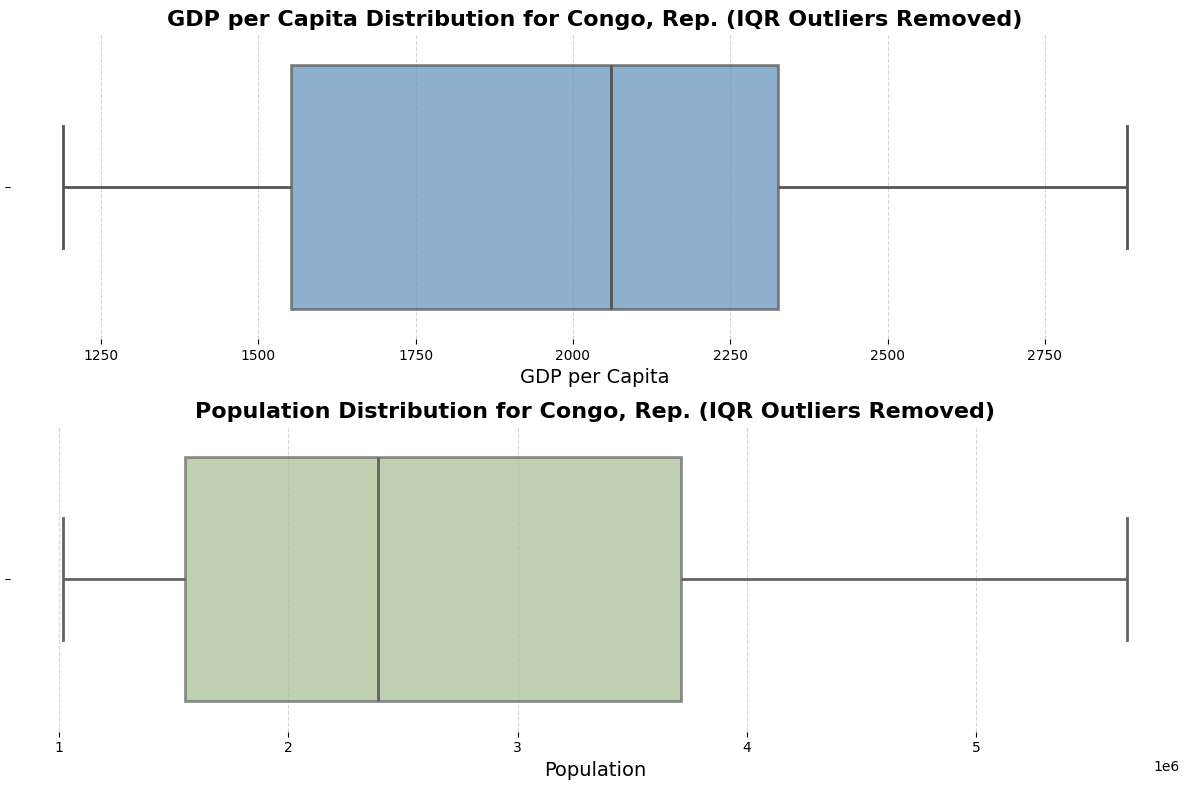

In [28]:
# Select a random country from merged_df_cleaned
random_country = random.choice(merged_df_cleaned['country'].unique())
country_data = merged_df_cleaned[merged_df_cleaned['country'] == random_country]

# IQR outlier removal for GDP per Capita
q1_gdp = country_data['gdp_per_capita'].quantile(0.25)
q3_gdp = country_data['gdp_per_capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp
lower_gdp = q1_gdp - 1.5 * iqr_gdp
upper_gdp = q3_gdp + 1.5 * iqr_gdp
gdp_no_outliers = country_data[(country_data['gdp_per_capita'] >= lower_gdp) & (country_data['gdp_per_capita'] <= upper_gdp)]

# IQR outlier removal for Population
q1_pop = country_data['population'].quantile(0.25)
q3_pop = country_data['population'].quantile(0.75)
iqr_pop = q3_pop - q1_pop
lower_pop = q1_pop - 1.5 * iqr_pop
upper_pop = q3_pop + 1.5 * iqr_pop
pop_no_outliers = country_data[(country_data['population'] >= lower_pop) & (country_data['population'] <= upper_pop)]

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# GDP per Capita boxplot (without outliers)
sns.boxplot(
    x='gdp_per_capita',
    data=gdp_no_outliers,
    orient='h',
    color='#4F8FCB',
    fliersize=6,
    linewidth=2,
    boxprops=dict(alpha=0.7),
    ax=axes[0]
)
axes[0].set_title(f'GDP per Capita Distribution for {random_country} (IQR Outliers Removed)', fontsize=16, weight='bold')
axes[0].set_xlabel('GDP per Capita', fontsize=14)
axes[0].grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True, ax=axes[0])

# Population boxplot (without outliers)
sns.boxplot(
    x='population',
    data=pop_no_outliers,
    orient='h',
    color='#A3C585',
    fliersize=6,
    linewidth=2,
    boxprops=dict(alpha=0.7),
    ax=axes[1]
)
axes[1].set_title(f'Population Distribution for {random_country} (IQR Outliers Removed)', fontsize=16, weight='bold')
axes[1].set_xlabel('Population', fontsize=14)
axes[1].grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True, ax=axes[1])

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

Let’s explore trends in population growth and GDP per capita over time.  
We’ll use:  
- Line plots for overall trends  
- Scatter plots to see relationships  
- Descriptive stats to summarize key points  


In the following code cell, we visualize the global trend of GDP per capita over time. We use the custom `plot_trend_with_baseline` function to plot the mean GDP per capita for all countries for each year from 1960 to 2021. The plot uses a logarithmic scale on the y-axis to better display the wide range of GDP values across countries and years. Additionally, a horizontal baseline is included to indicate the overall mean GDP per capita across the entire period, providing context for how yearly averages compare to the long-term global average. This visualization helps us quickly identify periods of growth, stagnation, or decline in global economic prosperity.

In [29]:
def plot_trend_with_baseline(df, group_var, value_var, agg_func='mean', baseline=True,
                             color='#023a5c', baseline_color='#855d04', figsize=(14,6),
                             title=None, xlabel=None, ylabel=None, log_scale=False):
    """
    Plots aggregated trend of value_var grouped by group_var with optional baseline.
    
    Parameters:
    - df: DataFrame
    - group_var: str, column to group by (e.g., 'year')
    - value_var: str, numeric column to aggregate (e.g., 'population')
    - agg_func: str, aggregation function - 'mean' or 'sum'
    - baseline: bool, whether to draw horizontal baseline for overall agg
    - color: str, color for the main plot line/bar
    - baseline_color: str, color for baseline
    - figsize: tuple, figure size
    - title, xlabel, ylabel: str, axis labels and title (optional)
    - log_scale: bool, use log scale for y axis
    
    Returns: None (displays plot)
    """
    # Define allowed aggregation methods
    agg_methods = {'mean': 'mean', 'sum': 'sum'}
    if agg_func not in agg_methods:
        raise ValueError("agg_func must be 'mean' or 'sum'")
    
    # Group the data by group_var (e.g., year) and aggregate value_var (e.g., mean GDP)
    grouped = df.groupby(group_var)[value_var].agg(agg_methods[agg_func]).reset_index()

    # Create the plot
    plt.figure(figsize=figsize)
    plt.plot(grouped[group_var], grouped[value_var], marker='o', color=color, linewidth=2)
    
    # Optionally add a horizontal baseline for the overall mean/sum
    if baseline:
        overall_val = df[value_var].agg(agg_methods[agg_func])
        plt.axhline(overall_val, color=baseline_color, linestyle='--', 
                    label=f'Overall {agg_func.title()}: {overall_val:.2f}')
    
    # Set plot title and axis labels
    plt.title(title or f'{agg_func.title()} {value_var.replace("_", " ").title()} by {group_var.title()}', fontsize=16, weight='bold')
    plt.xlabel(xlabel or group_var.title(), fontsize=14, weight='bold')
    plt.ylabel(ylabel or value_var.replace('_', ' ').title(), fontsize=14, weight='bold')
    
    # Optionally use a logarithmic scale for the y-axis
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In the code below, we visualize the global trend of GDP per capita over time using the cleaned and merged dataset (`merged_df`). We call the custom function `plot_trend_with_baseline`, which groups the data by year and calculates the mean GDP per capita for all countries for each year from 1960 to 2021. The plot uses a logarithmic scale on the y-axis to better represent the wide range of GDP values and includes a horizontal baseline showing the overall mean GDP per capita across the entire period. This helps us quickly identify periods of growth, stagnation, or decline in global economic prosperity.

This code is directly correlated with the data cleaning and transformation steps above. All previous steps—such as converting GDP values to numeric, reshaping the data into tidy format, handling missing values, and merging the datasets—were necessary to prepare the data for this kind of analysis and visualization. Without those steps, it would not be possible to accurately compute and plot global GDP per capita trends over time.

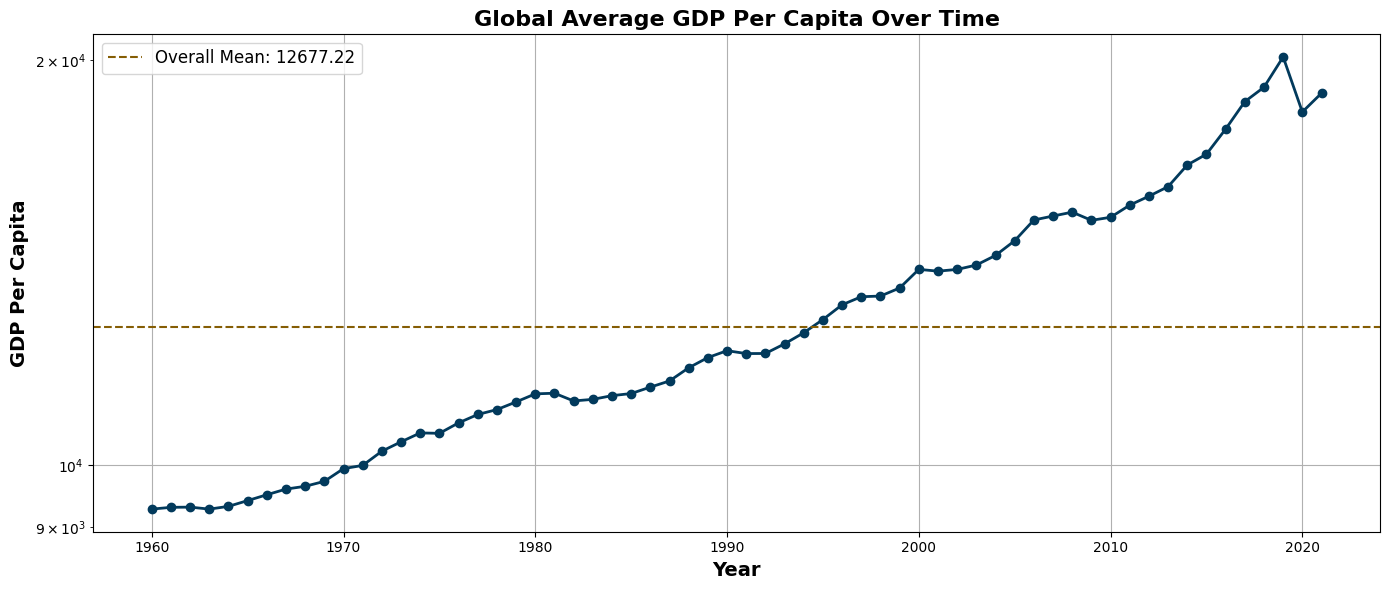

In [30]:
# GDP mean trend over years with log scale
plot_trend_with_baseline(merged_df_cleaned, 'year', 'gdp_per_capita', agg_func='mean', 
                         title='Global Average GDP Per Capita Over Time', ylabel='GDP Per Capita', log_scale=True)

## USA Population & GDP Growth Over Time: USA + 4 Random Countries

We will:  
- Select USA + 4 random countries  
- Plot population and GDP growth on two y-axes for clear comparison  
- Use line plots with different colors  


Selected countries: ['United States', 'Sri Lanka', 'Burundi', 'Antigua and Barbuda', 'Vietnam']


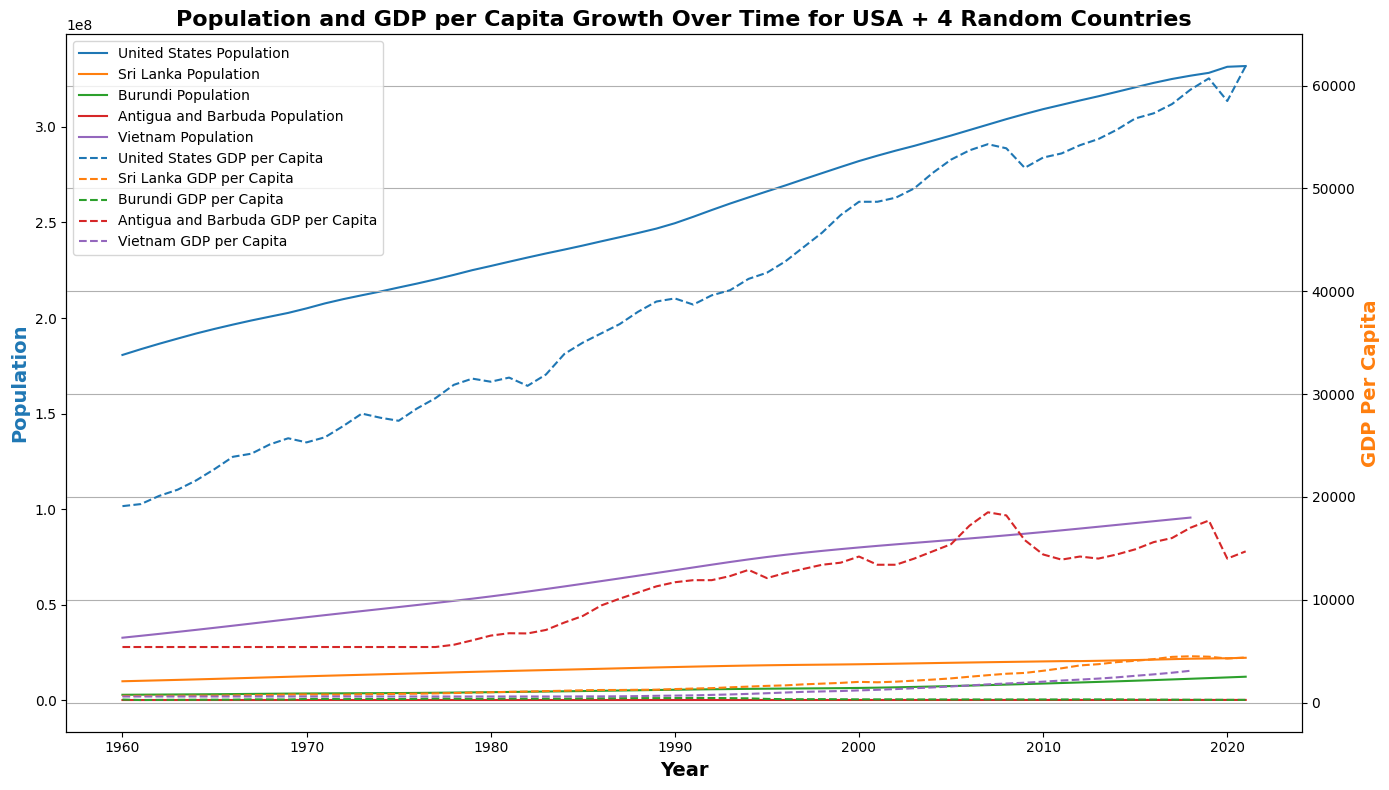

In [31]:
# Pick USA + 4 random countries
random.seed(42)  # for reproducibility
all_countries = merged_df_cleaned['country'].unique().tolist()
random_countries = random.sample([c for c in all_countries if c != 'United States'], 4)
selected_countries = ['United States'] + random_countries

print(f"Selected countries: {selected_countries}")

# Filter data for these countries
df_sel = merged_df_cleaned[merged_df_cleaned['country'].isin(selected_countries)]

plt.figure(figsize=(14,8))

# Plot Population
for country in selected_countries:
    country_data = df_sel[df_sel['country'] == country]
    plt.plot(country_data['year'], country_data['population'], label=f'{country} Population')

# Create twin axis for GDP
ax1 = plt.gca()
ax2 = ax1.twinx()

for country in selected_countries:
    country_data = df_sel[df_sel['country'] == country]
    ax2.plot(country_data['year'], country_data['gdp_per_capita'], linestyle='--', label=f'{country} GDP per Capita')

ax1.set_xlabel('Year', fontsize=14, weight='bold')
ax1.set_ylabel('Population', fontsize=14, color='tab:blue', weight='bold')
ax2.set_ylabel('GDP Per Capita', fontsize=14, color='tab:orange', weight='bold')

# Legends: combine both axes legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

plt.title('Population and GDP per Capita Growth Over Time for USA + 4 Random Countries', fontsize=16, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


## EDA Buffet

### 1- Line Plot: GDP per capita & population growth over time (USA + 4 random countries)

Visualize trends to see if GDP & population move together.


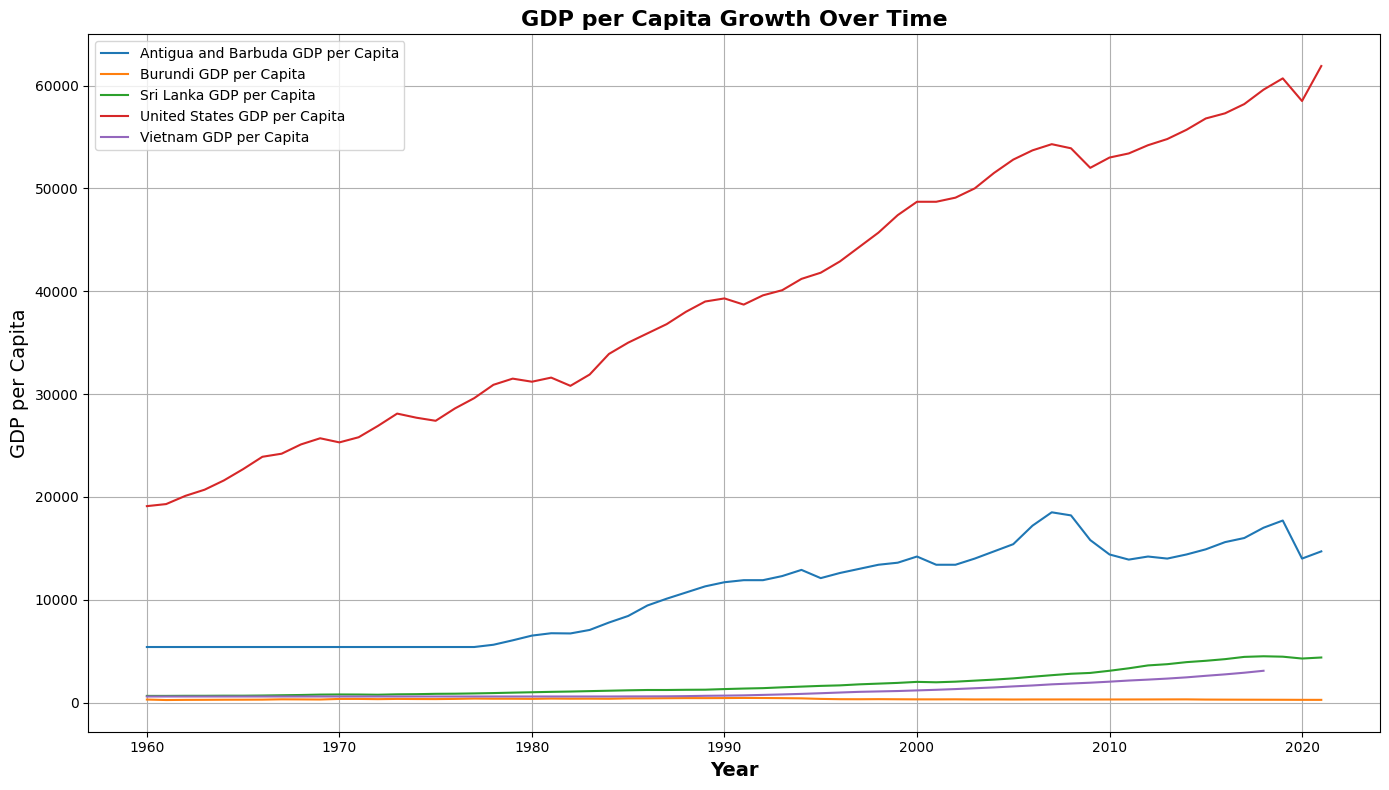

In [32]:
# Get the list of selected countries from the filtered DataFrame
selected_countries = df_sel['country'].unique().tolist()

plt.figure(figsize=(14,8))

# Loop through each selected country and plot its GDP per capita over time
for country in selected_countries:
    # Filter data for the current country
    country_data = df_sel[df_sel['country'] == country]
    # Plot year vs. GDP per capita for this country
    plt.plot(country_data['year'], country_data['gdp_per_capita'], label=f'{country} GDP per Capita')

# Set axis labels and plot title
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('GDP per Capita', fontsize=14)
plt.title('GDP per Capita Growth Over Time', fontsize=16, weight='bold')

# Show legend to distinguish countries
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


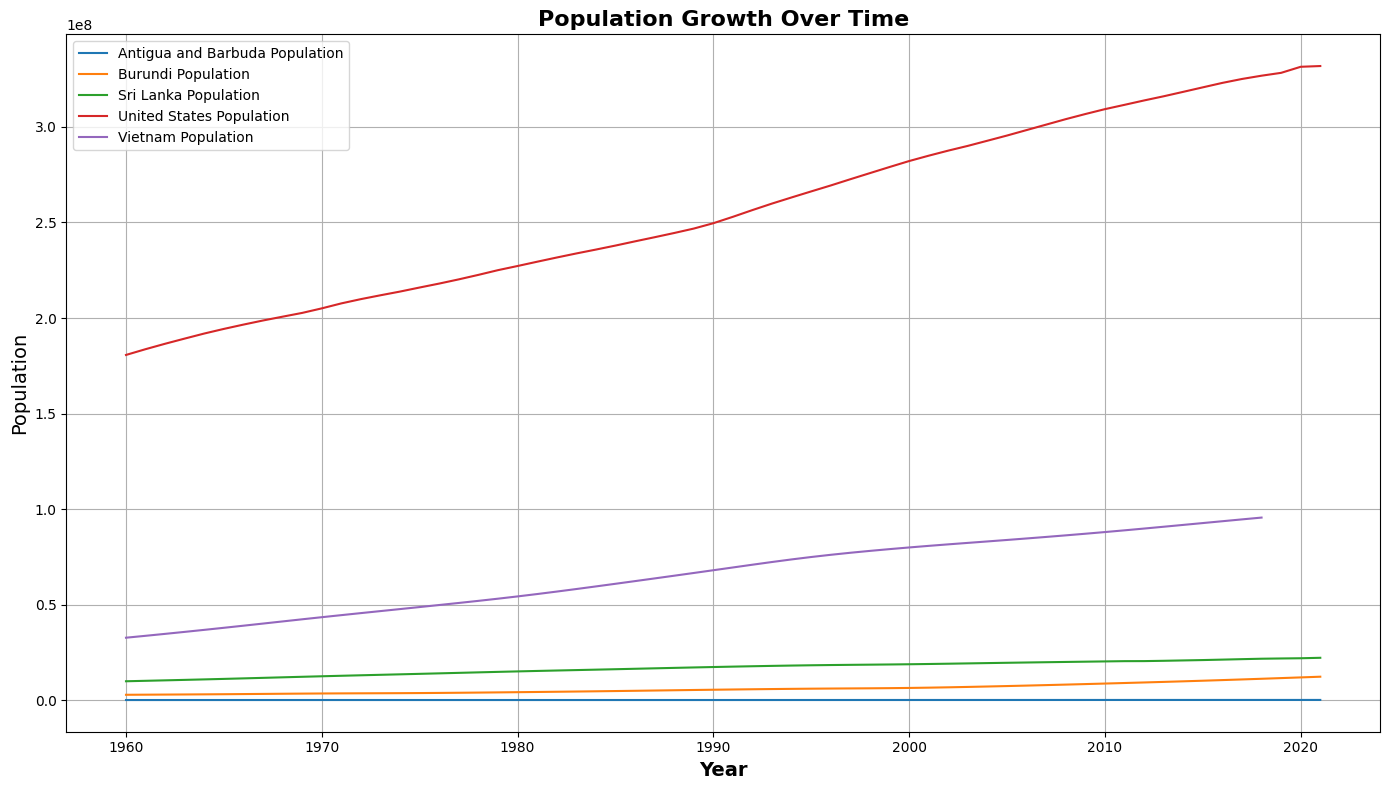

In [33]:
# Create a new figure with a specified size
plt.figure(figsize=(14,8))

# Loop through each selected country and plot its population over time
for country in selected_countries:
    # Filter the data for the current country
    country_data = df_sel[df_sel['country'] == country]
    # Plot year vs. population for this country
    plt.plot(country_data['year'], country_data['population'], label=f'{country} Population')

# Set the x-axis label
plt.xlabel('Year', fontsize=14, weight='bold')
# Set the y-axis label
plt.ylabel('Population', fontsize=14)
# Set the plot title
plt.title('Population Growth Over Time', fontsize=16, weight='bold')
# Show legend to distinguish countries
plt.legend()
# Add grid lines for better readability
plt.grid(True)
# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plot
plt.show()

### 2️- Bar Chart: Average GDP per capita across selected countries (2019–2021 average)

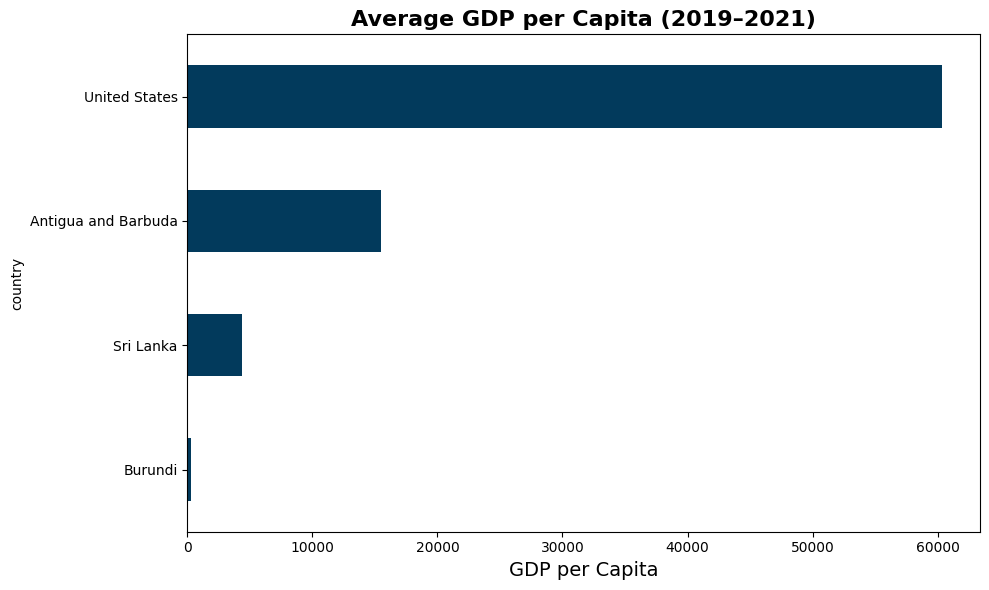

In [34]:
# Define the years of interest (the most recent 3 years)
latest_years = [2019, 2020, 2021]

# Filter the selected countries' DataFrame to only include rows from the latest years
df_recent = df_sel[df_sel['year'].isin(latest_years)]

# Group by country and calculate the average GDP per capita over 2019–2021, then sort for better visualization
avg_gdp = df_recent.groupby('country')['gdp_per_capita'].mean().sort_values()

# Create a horizontal bar plot of the average GDP per capita for each country
plt.figure(figsize=(10,6))
avg_gdp.plot(kind='barh', color='#023a5c')
plt.title('Average GDP per Capita (2019–2021)', fontsize=16, weight='bold')
plt.xlabel('GDP per Capita', fontsize=14)
plt.tight_layout()
plt.show()

### 3️- Boxplot: GDP per capita distribution (2021)

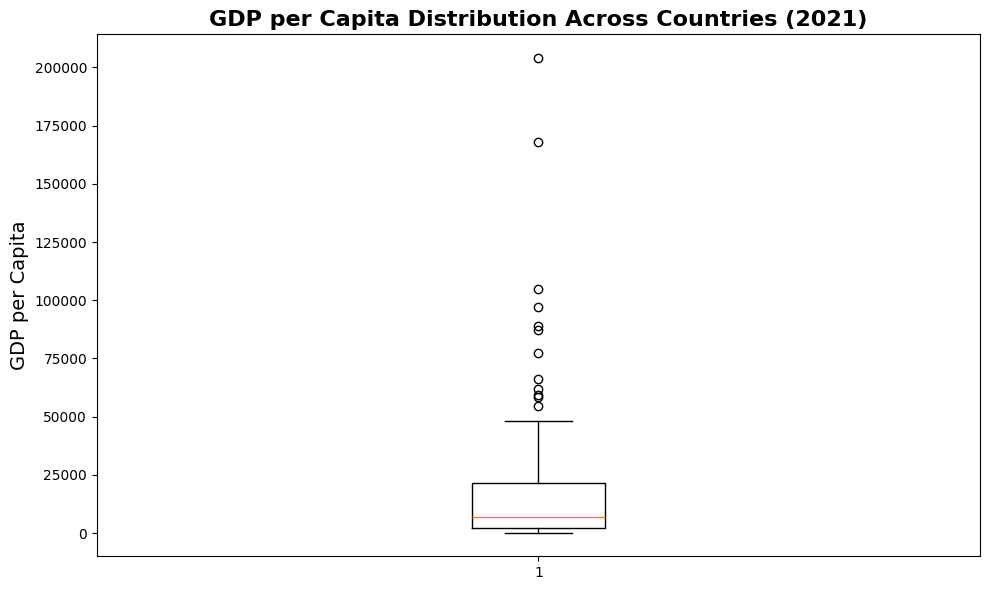

In [35]:
# Filter the merged dataset for the year 2021
df_2021 = merged_df_cleaned[merged_df_cleaned['year'] == 2021]

# Create a new figure with a specified size
plt.figure(figsize=(10,6))

# Plot a boxplot of GDP per capita values across all countries for 2021
# Drop any missing values to avoid errors in the plot
plt.boxplot(df_2021['gdp_per_capita'].dropna())

# Set the plot title and y-axis label for clarity
plt.title('GDP per Capita Distribution Across Countries (2021)', fontsize=16, weight='bold')
plt.ylabel('GDP per Capita', fontsize=14)

# Adjust layout to prevent label overlap and display the plot
plt.tight_layout()
plt.show()

### 4️- Scatter Plot: GDP per capita vs Population (2021)
Does bigger population = higher GDP per capita?

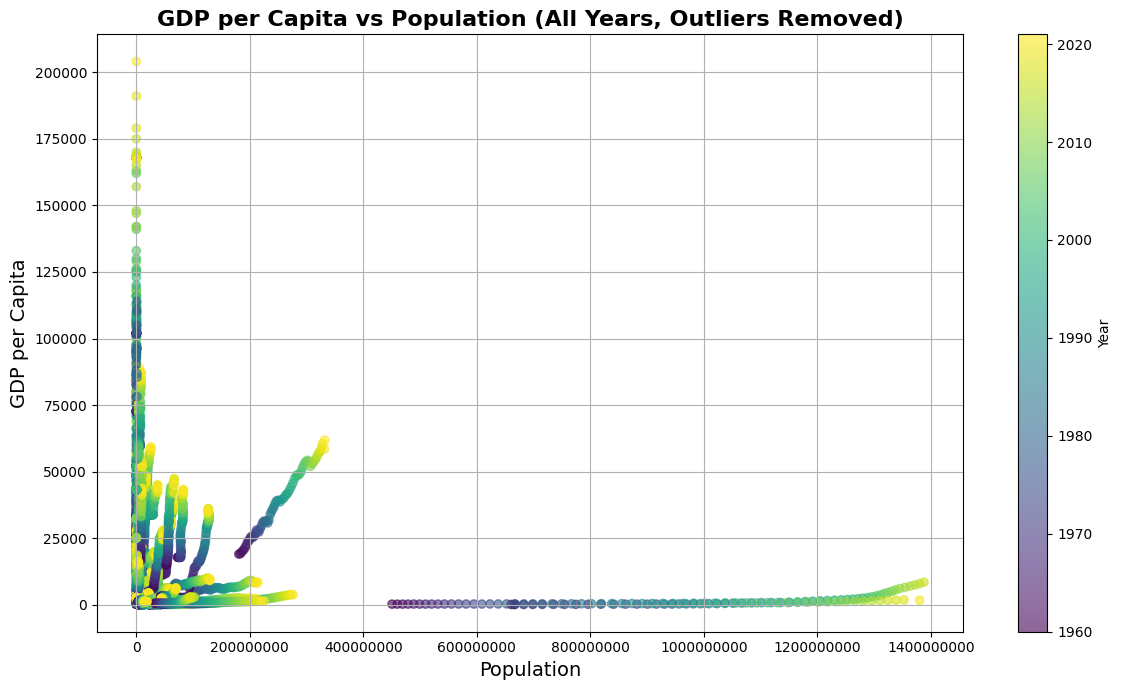

In [ ]:
plt.figure(figsize=(12, 7))

scatter = plt.scatter(
    merged_df_cleaned['population'],
    merged_df_cleaned['gdp_per_capita'],
    c=merged_df_cleaned['year'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel('Population', fontsize=14)
plt.ylabel('GDP per Capita', fontsize=14)
plt.title('GDP per Capita vs Population (All Years, Outliers Removed)', fontsize=16, weight='bold')
plt.colorbar(scatter, label='Year')
plt.grid(True, which='both')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


### 5- Area Chart: Stacked population over time (selected countries)

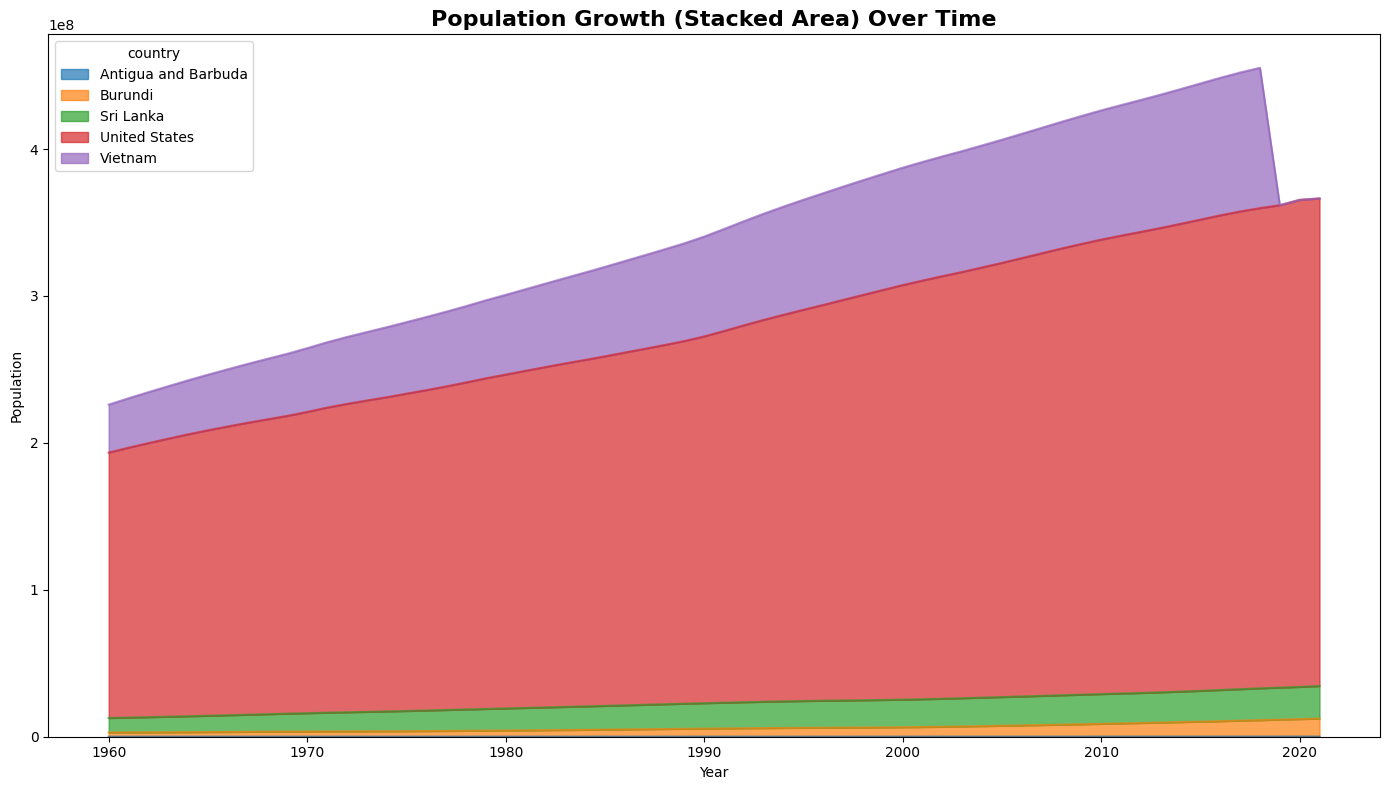

In [37]:
# Pivot the filtered DataFrame (df_sel) so that:
# - Each row is a year
# - Each column is a country
# - The cell values are the population for that country and year
pivoted = df_sel.pivot(index='year', columns='country', values='population')

# Plot a stacked area chart to show population growth over time for each selected country
pivoted.plot.area(figsize=(14,8), alpha=0.7)

# Set the plot title and axis labels
plt.title('Population Growth (Stacked Area) Over Time', fontsize=16, weight='bold')
plt.ylabel('Population')
plt.xlabel('Year')

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()

## Research Question
Does GDP per capita growth correlate with population growth for the USA and selected countries (1960–2021)?

We'll:
- Calculate year-over-year growth rates for both GDP per capita and population.
- Visualize them side by side to spot trends.
- Measure correlation between the two growth rates to see if higher population growth matches higher GDP per capita growth.


### Calculate growth rates

In [38]:
# Calculate year-over-year GDP and population growth rates for each selected country

growth_dfs = []

for country in selected_countries:
    # Filter data for the current country and make a copy
    temp = df_sel[df_sel['country'] == country].copy()
    # Calculate year-over-year GDP per capita growth rate (%)
    temp['gdp_growth'] = temp['gdp_per_capita'].pct_change() * 100
    # Calculate year-over-year population growth rate (%)
    temp['pop_growth'] = temp['population'].pct_change() * 100
    # Append the result to the list
    growth_dfs.append(temp)

# Concatenate all country growth DataFrames into one
growth_df = pd.concat(growth_dfs, ignore_index=True)

# Quick check: show country, year, and calculated growth rates
growth_df[['country', 'year', 'gdp_growth', 'pop_growth']].head()


,country,year,gdp_growth,pop_growth
0,Antigua and Barbuda,1960,NaN,NaN
1,Antigua and Barbuda,1961,0.0,1.612724
2,Antigua and Barbuda,1962,0.0,1.534406
3,Antigua and Barbuda,1963,0.0,1.525542
4,Antigua and Barbuda,1964,0.0,1.657819


To answer our research question — *"Does GDP per capita growth correlate with population growth for the USA and selected countries from 1960–2021?"* —  
we:
1. Calculated year-over-year growth rates for both GDP per capita and population.
2. Visualized these growth rates over time.
3. Computed the correlation between the two growth rates for each country.

To keep the notebook clean, we created a helper function that:
- Calculates the growth rates
- Plots GDP and population growth
- Computes and returns the correlation


In [39]:
def plot_growth_and_corr(df, countries, figsize=(14,8)):
    """
    For selected countries:
    - Calculates GDP per capita & population year-over-year growth rates
    - Plots both over time
    - Computes correlation between the two growth rates
    """
    import matplotlib.pyplot as plt

    # Calculate growth rates for each country
    growth_dfs = []
    for country in countries:
        temp = df[df['country'] == country].copy()
        temp['gdp_growth'] = temp['gdp_per_capita'].pct_change() * 100  # GDP growth %
        temp['pop_growth'] = temp['population'].pct_change() * 100      # Population growth %
        growth_dfs.append(temp)
    growth_df = pd.concat(growth_dfs, ignore_index=True)

    # Plot GDP per capita growth rate
    plt.figure(figsize=figsize)
    for country in countries:
        subset = growth_df[growth_df['country'] == country]
        plt.plot(subset['year'], subset['gdp_growth'], label=f'{country} GDP Growth')
    plt.title('GDP per Capita Growth Rate Over Time', fontsize=16, weight='bold')
    plt.ylabel('Growth Rate (%)')
    plt.xlabel('Year')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot population growth rate
    plt.figure(figsize=figsize)
    for country in countries:
        subset = growth_df[growth_df['country'] == country]
        plt.plot(subset['year'], subset['pop_growth'], label=f'{country} Population Growth')
    plt.title('Population Growth Rate Over Time', fontsize=16, weight='bold')
    plt.ylabel('Growth Rate (%)')
    plt.xlabel('Year')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Compute correlation between GDP and population growth for each country
    print("\nCorrelation between GDP & Population growth:")
    corrs = {}
    for country in countries:
        subset = growth_df[growth_df['country'] == country]
        corr = subset[['gdp_growth', 'pop_growth']].corr().iloc[0,1]
        corrs[country] = corr
    return pd.Series(corrs, name='Correlation')


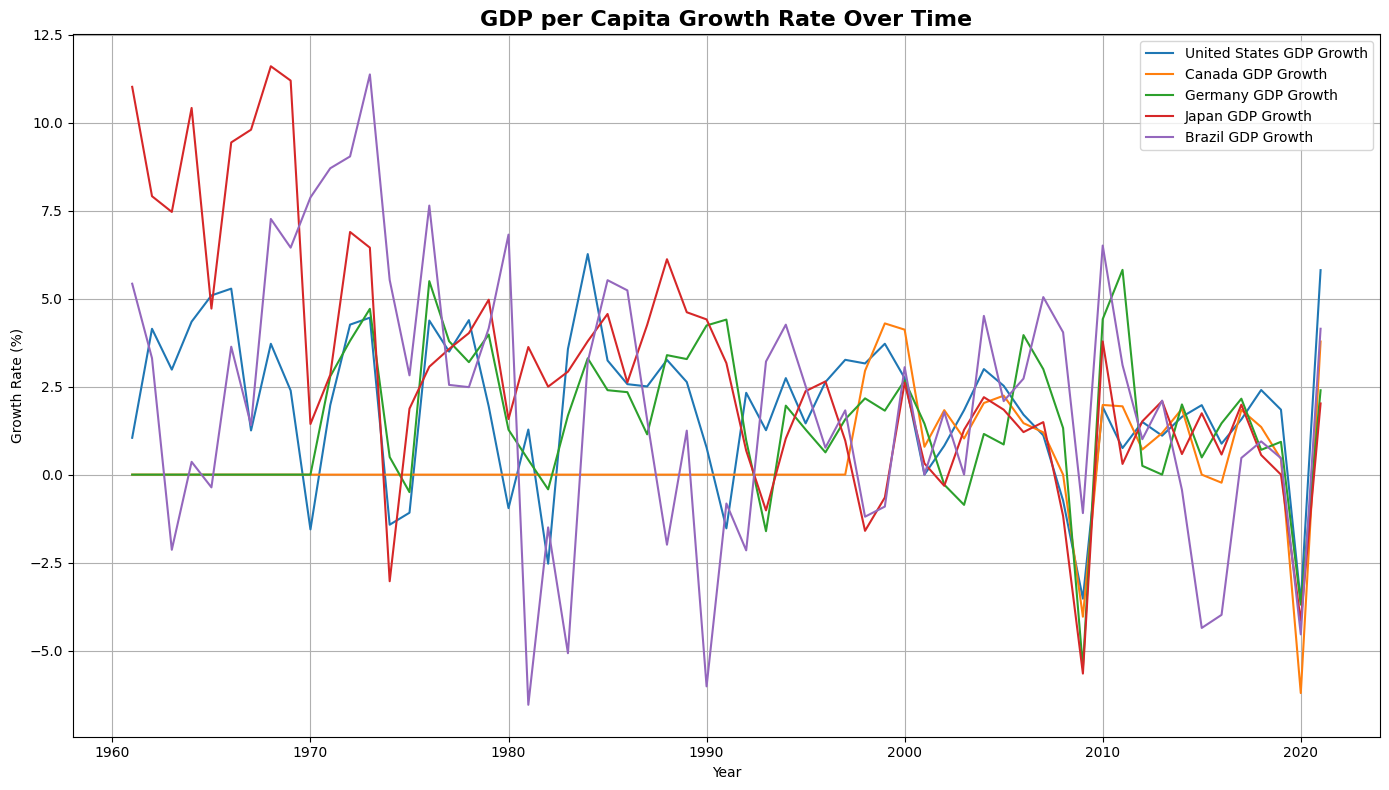

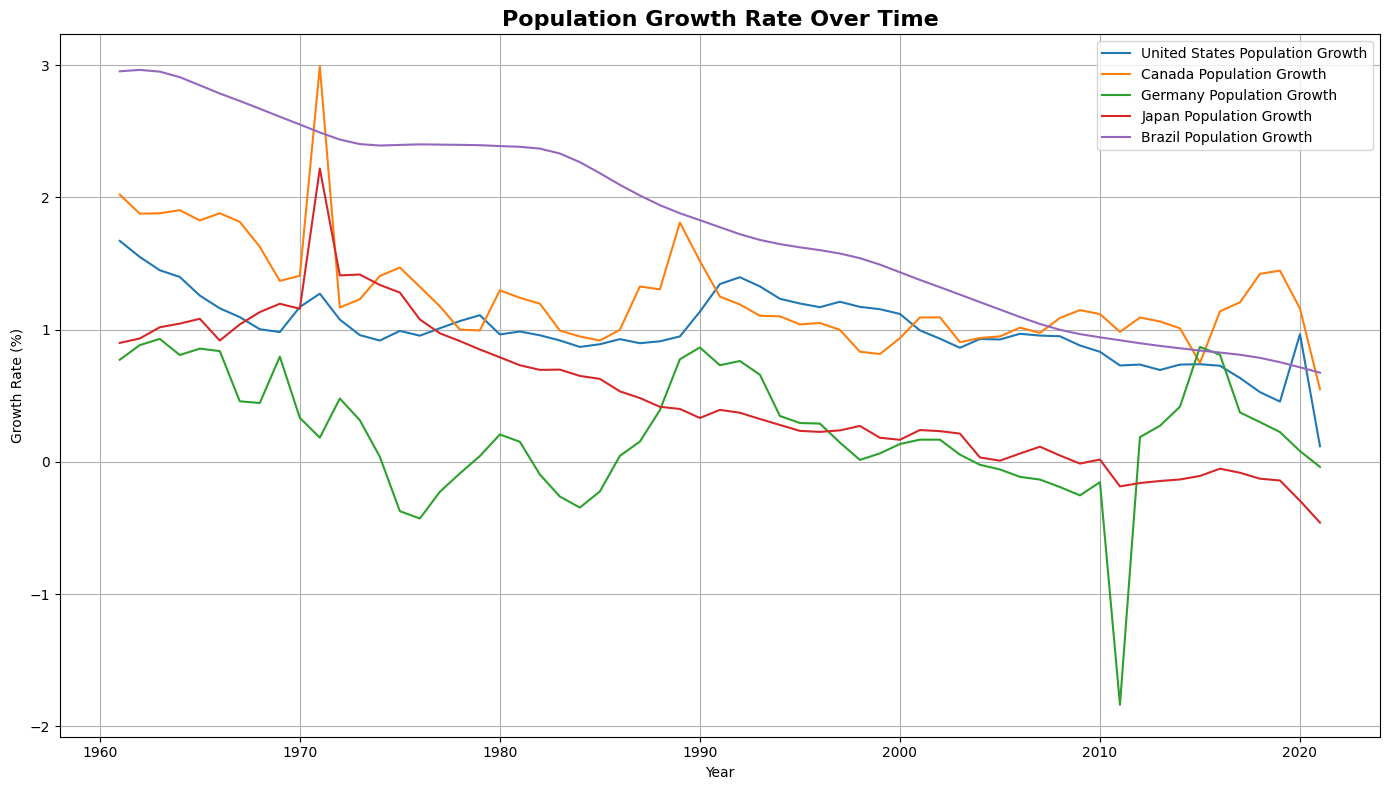


Correlation between GDP & Population growth:


United States    0.019531
Canada          -0.284813
Germany         -0.274625
Japan            0.542647
Brazil           0.278433
Name: Correlation, dtype: float64

In [40]:
selected_countries = ['United States', 'Canada', 'Germany', 'Japan', 'Brazil']
plot_growth_and_corr(merged_df_cleaned, selected_countries)

## Interpretation
###  Findings & Interpretation

After calculating the year-over-year growth rates and visualizing them:
- **World population trends (1960–2021):** Population has grown steadily across nearly all countries, with the global total more than doubling over the period. Growth rates have slowed in many developed countries, while developing regions continue to see higher rates of increase.

- **GDP per capita trends:** GDP per capita has generally increased worldwide, but the pace and consistency of growth vary greatly by country and region. Some countries have experienced rapid economic growth, while others have seen stagnation or even declines during certain periods.

- **Correlation between GDP per capita and population growth:** The relationship between GDP per capita growth and population growth is complex. In some countries, higher population growth coincides with economic expansion, but in others, rapid population growth does not translate into higher GDP per capita. The correlation is often weak or inconsistent, suggesting other factors play a significant role.

- **Countries with divergent growth patterns:** There are clear examples of countries with high population growth but low economic growth, and vice versa. This highlights that demographic expansion alone does not guarantee prosperity, and economic policies, stability, and external factors are crucial.

- **Developed vs. developing countries:** Developed countries tend to have slower population growth and higher, more stable GDP per capita, while developing countries often experience faster population increases but more volatile or lower economic growth.

Overall, the analysis shows that while economic and demographic trends are linked, the relationship is not straightforward. Economic prosperity depends on a range of factors beyond population growth, and each country's trajectory is shaped by its unique circumstances.


## Conclusion

This analysis demonstrates that while global population and GDP per capita have both increased significantly from 1960 to 2021, the relationship between demographic growth and economic prosperity is complex and varies widely across countries. Population growth has generally slowed in developed nations while remaining high in many developing regions. GDP per capita has risen overall, but with substantial differences in growth rates and volatility between countries. The correlation between population growth and GDP per capita growth is often weak, highlighting that economic development depends on a range of factors beyond population size alone. Ultimately, understanding the interplay between demographic and economic trends requires considering additional variables such as policy, education, health, and global events. This project provides a foundation for further exploration into the drivers of prosperity and demographic change worldwide.

## Reflection

With more time or access to richer datasets, I would incorporate additional socioeconomic indicators (such as education, health, or inequality metrics) to deepen the analysis of how population trends interact with economic prosperity. Some data quality issues—like missing or inconsistent GDP per capita values for certain countries and years—could not be fully resolved, potentially affecting the completeness of the results. If possible, I would also explore subnational trends or the impact of major global events (e.g., financial crises, pandemics) on the relationship between population and economic growth. Further questions could include examining the role of migration, urbanization, or technological change in shaping these long-term trends.